# Análise Exploratória de dados Desafio ELOFAR

**Importando bibliotecas básicas para a ánalise**

In [1]:
import pandas as pd
import datetime as dt

**Importando o arquivo .csv, utilizando o separador '|'**

In [2]:
data = pd.read_csv('desafio_BI.csv', sep='|')

**Primeira visualização dos dados**

In [3]:
data.head()

,Data,Marca,Fabricante,Referência_Elofar,UF,Unidades,R$,Tipo_canal
0,2018-01-01,ALIVBABY,CAZI,BENZEVIT,BA,"31,0","171,886",FARMACIAS
1,2018-01-01,ALIVBABY,CAZI,BENZEVIT,CE,"529,0","3160,751",FARMACIAS
2,2018-01-01,ALIVBABY,CAZI,BENZEVIT,DF,"7,0","38,813",FARMACIAS
3,2018-01-01,ALIVBABY,CAZI,BENZEVIT,GO,"15,0","83,17",FARMACIAS
4,2018-01-01,ALIVBABY,CAZI,BENZEVIT,MA,"295,0","1635,689",FARMACIAS


Analisando as 5 primeiras linhas e 5 últimas linhas da base de dados, junto com o formato.

No primeiro momento, pode-se estimar que nossos dados começam em janeiro de 2018 e terminam em dezembro de 2020.

In [4]:
display(data) 

,Data,Marca,Fabricante,Referência_Elofar,UF,Unidades,R$,Tipo_canal
0,2018-01-01,ALIVBABY,CAZI,BENZEVIT,BA,"31,0","171,886",FARMACIAS
1,2018-01-01,ALIVBABY,CAZI,BENZEVIT,CE,"529,0","3160,751",FARMACIAS
2,2018-01-01,ALIVBABY,CAZI,BENZEVIT,DF,"7,0","38,813",FARMACIAS
3,2018-01-01,ALIVBABY,CAZI,BENZEVIT,GO,"15,0","83,17",FARMACIAS
4,2018-01-01,ALIVBABY,CAZI,BENZEVIT,MA,"295,0","1635,689",FARMACIAS
...,...,...,...,...,...,...,...,...
253265,2020-12-01,VITPURUM,VITAMEDIC,VI-FERRIN,RO,"58,0","393,82",FARMACIAS
253266,2020-12-01,VITPURUM,VITAMEDIC,VI-FERRIN,RS,"22,0","149,38",FARMACIAS
253267,2020-12-01,VITPURUM,VITAMEDIC,VI-FERRIN,SC,"1,0","6,79",FARMACIAS
253268,2020-12-01,VITPURUM,VITAMEDIC,VI-FERRIN,SP,"109,0","740,11",FARMACIAS


O shape do nossos dados é 253.270 linhas e 8 colunas

**Descobrindo o período da análise**

In [5]:
inicio = pd.to_datetime(data['Data']).dt.date.min()
print('Nossa primeira data = ' ,inicio)

Nossa primeira data =  2018-01-01


In [6]:
fim = pd.to_datetime(data['Data']).dt.date.max()
print('Nossa última data = ', fim)

Nossa última data =  2020-12-01


**Verificando valores nulos e tipo de dados**

* Não possuímos dados nulos nesta base de dados
* Todos os valores são do tipo object. Na fase de tratamento dos dados, será necessário uma atenção em algumas colunas 
* Como por exemplo a coluna 'Unidades' e 'Data'

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253270 entries, 0 to 253269
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Data               253270 non-null  object
 1   Marca              253270 non-null  object
 2   Fabricante         253270 non-null  object
 3   Referência_Elofar  253270 non-null  object
 4   UF                 253270 non-null  object
 5   Unidades           253270 non-null  object
 6   R$                 253270 non-null  object
 7   Tipo_canal         253270 non-null  object
dtypes: object(8)
memory usage: 15.5+ MB


## Analisando as informações estatísticas

In [8]:
data.describe()

,Data,Marca,Fabricante,Referência_Elofar,UF,Unidades,R$,Tipo_canal
count,253270,253270,253270,253270,253270,253270,253270,253270
unique,36,316,104,10,27,21277,217575,3
top,2020-12-01,COMBIRON FOLICO,EMS,CIPROFAR,SP,"1,0","63,666",FARMACIAS
freq,7650,2383,20045,44287,14428,12929,72,159712


**Podemos ver que temos 316 valores únicos para a variável 'Marca', 104 para 'Fabricante', apenas 10 para 'Referência_Elofar',27 para 'UF' e 3 para 'Tipo_canal'.**

Também podemos ver qual o valor que mais se repete em cada variável e sua frequência.

* **Data** -> Top (2020-12-01) = Possível indicação de crescimento da empresa ao decorrer dos anos;

* **Marca** -> Top (COMBIRON FOLICO) = Combiron é indicado no tratamento das anemias carenciais como nas correções das anemias provocadas por distúrbios nutricionais ou medicamentosos;

* **Fabricante** -> Top (EMS)  = Sua maior frequência pode-se ocorrer pelo fato de umas das suas principais habilidades ser a produção de medicamentos genéricos ( Medicamentos de menor custo ao consumidor);

* **Referência_Elofar** -> Top (CIPROFAR) = Ciprofar é um medicamento indicado no tratamento de Infecções causadas por microrganismos;

* **UF** -> Top (SP) -> indica que São Paulo é o estado com maior volume de produtos;

* **Unidades** -> Top (Unidades) = 1 única unidade, o que pode ser algum erro na hora de preencher os dados

* **Tipo_canal** -> Top (Farmacias) = O meio em que os produtos possuem maior consumo é por farmácias.

## Entendo inicialmente nosso dados categóricos 

* Combiron Folico Realmente aparece com mais frequência, mas sua distância dos outros valores é pequena como podemos ver.
* O que mostra que não há uma discrepância de "vendas" entre os medicamentos fornecidos.
* Entre os top 20 há uma diferença de 373 aparições.

In [9]:
data['Marca'].value_counts()[:20]

COMBIRON FOLICO         2383
NEUTROFER               2356
MASFEROL                2335
CIPROFLOXACINO P.D      2328
BACTRIM F               2316
NORIPURUM               2293
BACTRIM                 2291
NISTA+ZINCO EMS         2222
SULFAME+TRIMETO. P.D    2212
COMBIRON                2155
NISTA+ZINCO N.Q         2155
OS-CAL D                2146
FERRONIL                2126
OTOSYLASE               2113
OTOSPORIN               2108
OTOCIRIAX               2086
NIMELIT                 2062
OS-CAL                  2059
SULFAME+TRIMETO. TTF    2037
CIMELIDE                2010
Name: Marca, dtype: int64

**Mas isso não significa que esses medicamentos possuem um grande percentual em relação aos outros. Como podemos ver abaixo.**

In [10]:
print('Porcentual de aparições na base de dados')
data['Marca'].value_counts()[:20] / 253270

Porcentual de aparições na base de dados


COMBIRON FOLICO         0.009409
NEUTROFER               0.009302
MASFEROL                0.009219
CIPROFLOXACINO P.D      0.009192
BACTRIM F               0.009144
NORIPURUM               0.009054
BACTRIM                 0.009046
NISTA+ZINCO EMS         0.008773
SULFAME+TRIMETO. P.D    0.008734
COMBIRON                0.008509
NISTA+ZINCO N.Q         0.008509
OS-CAL D                0.008473
FERRONIL                0.008394
OTOSYLASE               0.008343
OTOSPORIN               0.008323
OTOCIRIAX               0.008236
NIMELIT                 0.008142
OS-CAL                  0.008130
SULFAME+TRIMETO. TTF    0.008043
CIMELIDE                0.007936
Name: Marca, dtype: float64

**ESM possui 8 mil aparições a mais em nossa base de dados em comparação com o segundo (FQM Grupo)**

In [11]:
data['Fabricante'].value_counts()

EMS            20045
FQM GRUPO      12227
EUROFARMA      12096
GLOBO          11520
GEOLAB         11392
               ...  
ATIVUS VITA        2
BIOFARMA           2
STIEFEL            1
TKS                1
LASA               1
Name: Fabricante, Length: 104, dtype: int64

**Confirma que o medicamento Ciprofar é o que mais aparece em nossos dados, ao mesmo tempo o medicamento VI-Ferrin aparece em segundo.**

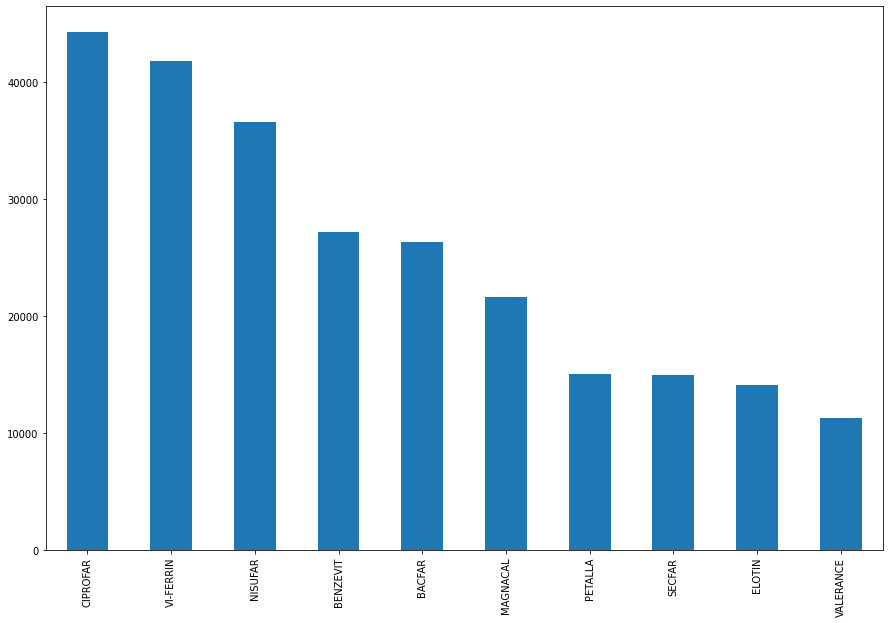

In [12]:
data['Referência_Elofar'].value_counts().plot(kind='bar', figsize=(15,10));

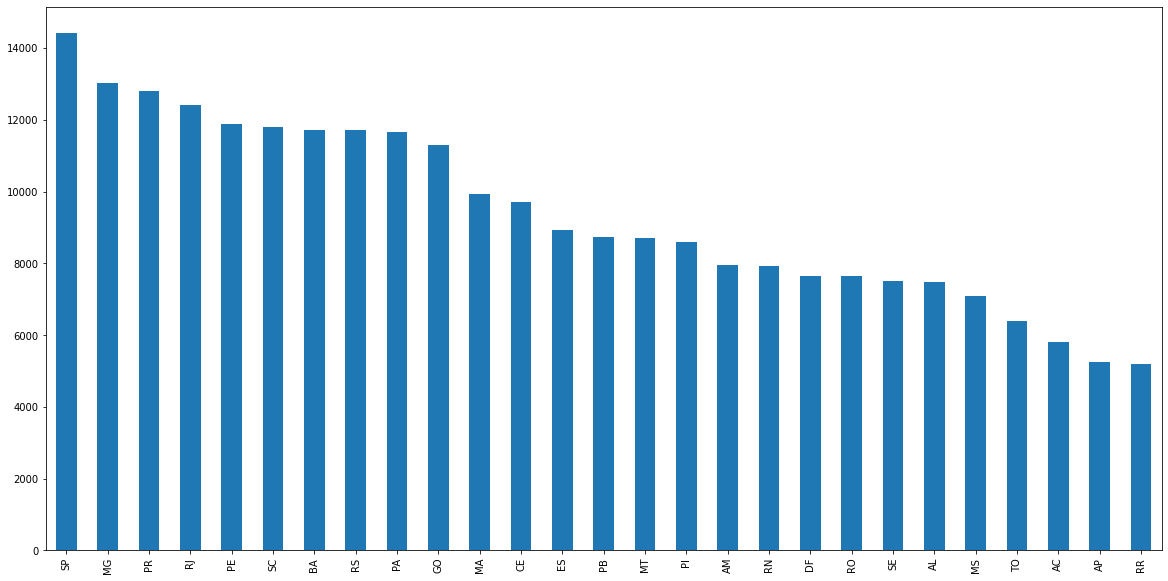

In [13]:
data['UF'].value_counts().plot(kind='bar', figsize=(20,10));

In [14]:
data['Tipo_canal'].value_counts()/ 253270 


FARMACIAS     0.630600
OUTROS        0.221894
HOSPITALAR    0.147507
Name: Tipo_canal, dtype: float64

* 63% dos dados são referênte a Farmácias
* 22% dos dados são referênte a Outros
* 14,7% dos dados são referêntes a Hospitalar

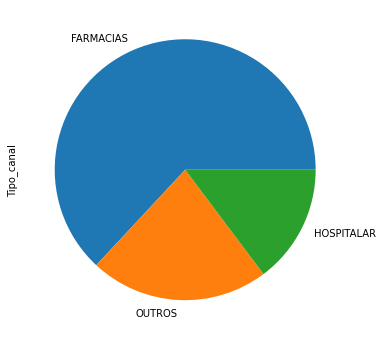

In [15]:
data['Tipo_canal'].value_counts().plot(kind='pie', figsize=(8,6));